In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [4]:
df_st = pd.read_csv("starbucks.csv").fillna("")
df_bc = pd.read_csv("best cities for a workation.csv", encoding='utf-8')

In [5]:
df_st

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,,,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,,,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,,,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,,,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.7,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,,GMT+000000 Africa/Johannesburg,28.28,-25.79


In [6]:
df_st=df_st.rename(columns={'Country':'code'})
st_list=[]
st_list=df_st['code'].value_counts()
df_st2=st_list.to_frame(name='매장 수')
# df_st2.reset_index(level=0, inplace=True)
# df_st2.rename(columns={'index':'국가'}, inplace=True)
df_st2

,매장 수
US,13608
CN,2734
CA,1468
JP,1237
KR,993
...,...
AW,3
SK,3
LU,2
MC,2


In [7]:
bc_st=pd.read_csv('bc_st.csv')

In [8]:
bc_st.sort_values('Ranking', ascending=True, inplace=True)
bc_st
# Starbucks_in_Workation에서 저장했던 csv파일 데이터를 확인

,Unnamed: 0,Ranking,City,Country,code,num_st_city,num_st_country
0,0,1,Bangkok,Thailand,TH,76,289
1,1,2,New Delhi,India,IN,16,88
2,2,3,Lisbon,Portugal,PT,2,11
3,3,4,Barcelona,Spain,ES,20,101
4,4,5,Buenos Aires,Argentina,AR,74,108
...,...,...,...,...,...,...,...
142,142,143,Beirut,Lebanon,LB,12,29
143,143,144,Zurich,Switzerland,CH,25,61
144,144,145,Geneva,Switzerland,CH,5,61
145,145,146,Valletta,Malta,MT,0,0


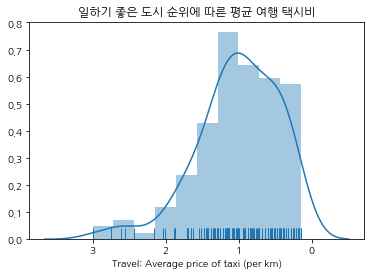

In [9]:
plt.title('일하기 좋은 도시 순위에 따른 평균 여행 택시비')
sns.distplot(df_bc['Travel: Average price of taxi (per km)'], rug=True).invert_xaxis()
#일하기 좋은 도시의 순위(x축), 여행시 평균 택시비(y축)

C:\Users\hi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


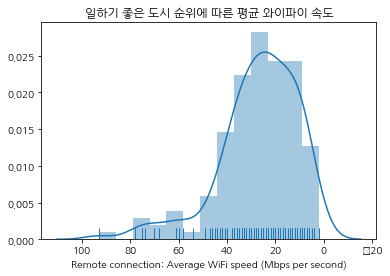

In [10]:
plt.title('일하기 좋은 도시 순위에 따른 평균 와이파이 속도')
sns.distplot(df_bc['Remote connection: Average WiFi speed (Mbps per second)'], rug=True).invert_xaxis()
#일하기 좋은 도시의 순위(x축), 와이파이 속도(y축)

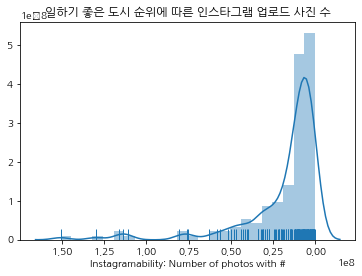

In [11]:
plt.title('일하기 좋은 도시 순위에 따른 인스타그램 업로드 사진 수')
sns.distplot(df_bc['Instagramability: Number of photos with #'], rug=True).invert_xaxis()
#일하기 좋은 도시의 순위(x축), 인스타그램에 올린 사진 수(y축)

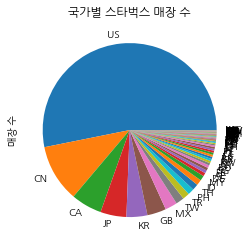

In [12]:
plt.title('국가별 스타벅스 매장 수')
plt.rcParams["figure.figsize"]=(12,12)
df_st2['매장 수'].plot.pie() 
#국가별 스타벅스 매장 수

C:\Users\hi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 227 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 227 missing from current font.
  font.set_text(s, 0, flags=flags)


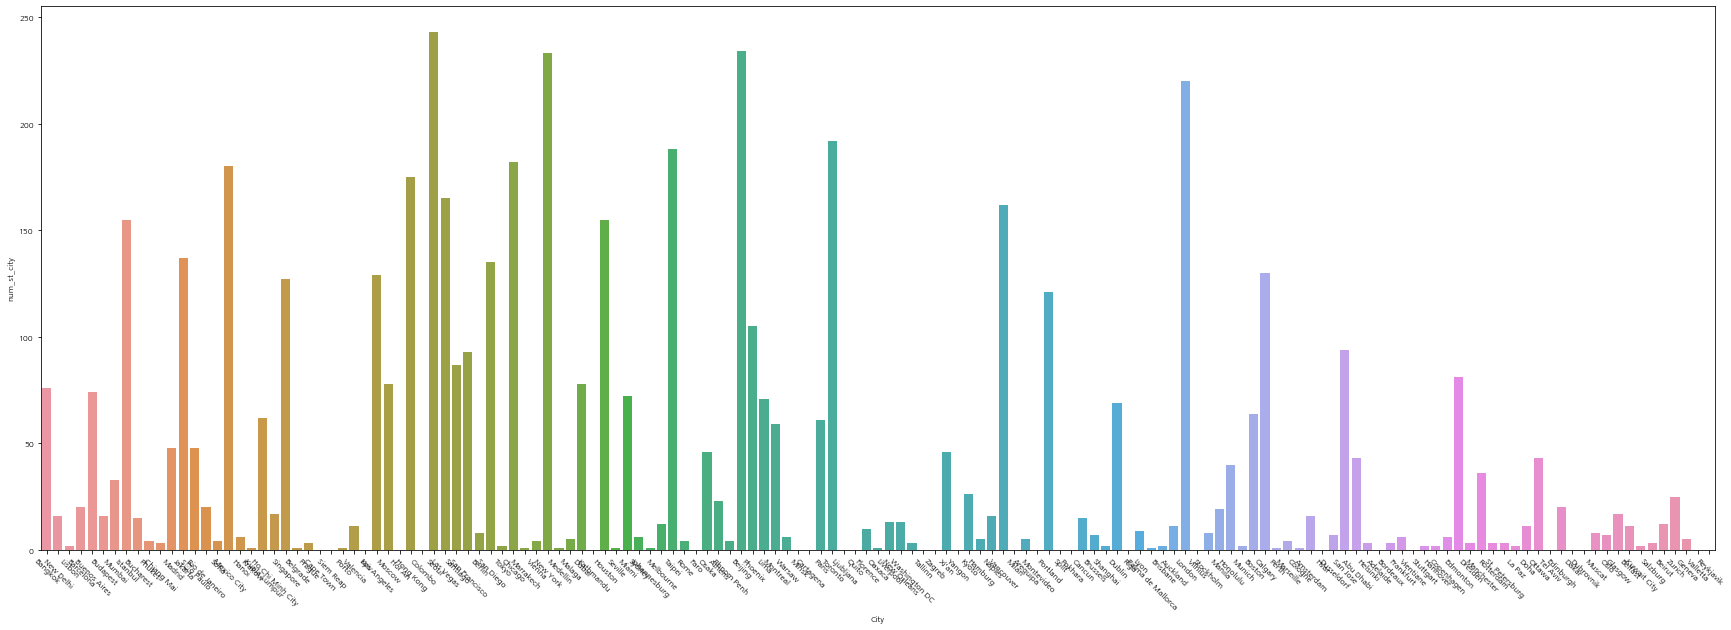

In [13]:
plt.rcParams["figure.figsize"]=(30,10)
plt.rcParams["font.size"]=8
plt.xticks(rotation = - 45 )
sns.barplot(x='City', y='num_st_city', data=bc_st)
#도시별 스타벅스 매장 수

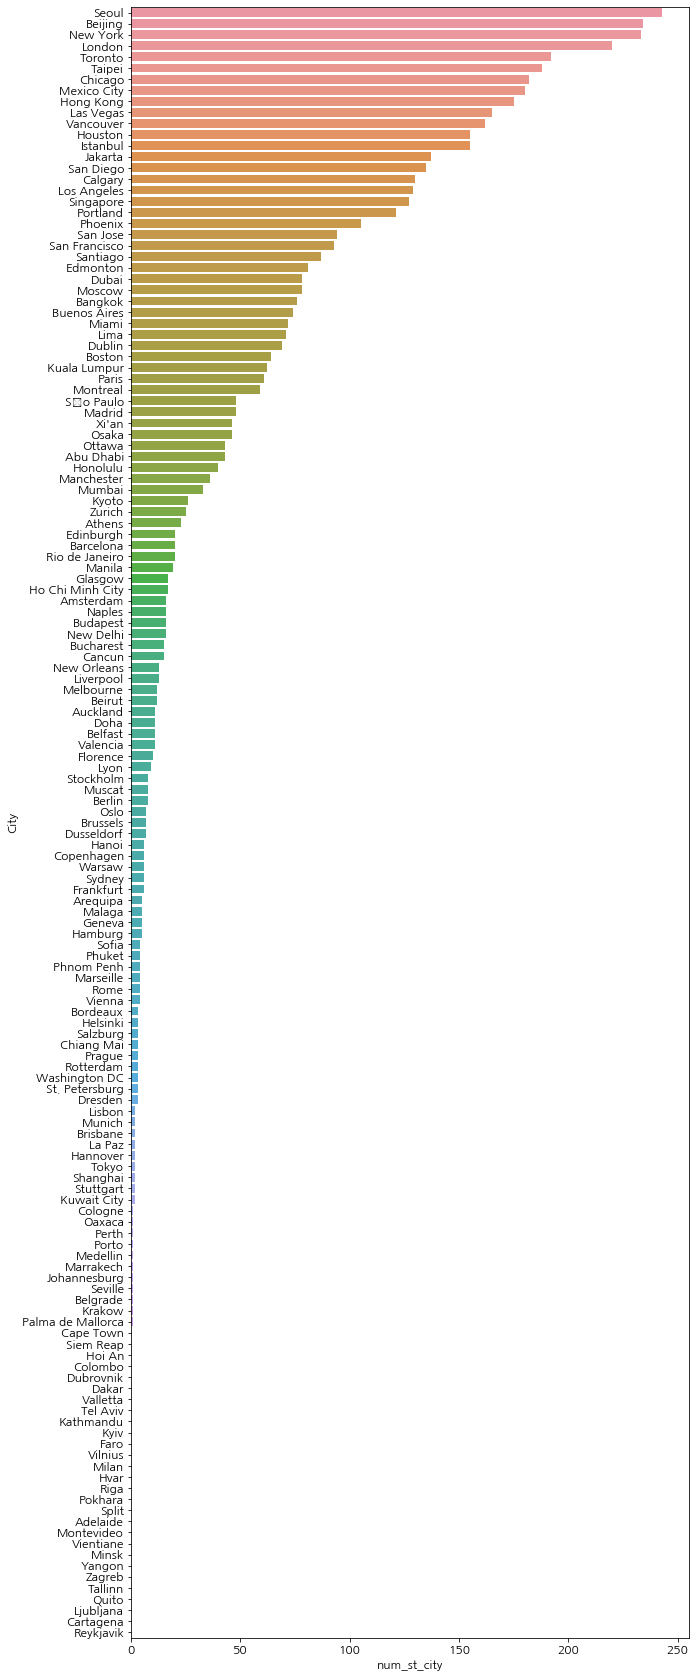

In [14]:
plt.rcParams["figure.figsize"]=(10,30)
plt.rcParams["font.size"]=12
sns.barplot(y='City', x='num_st_city', data=bc_st.sort_values('num_st_city', ascending=False))
#도시별 스타벅스 매장 수

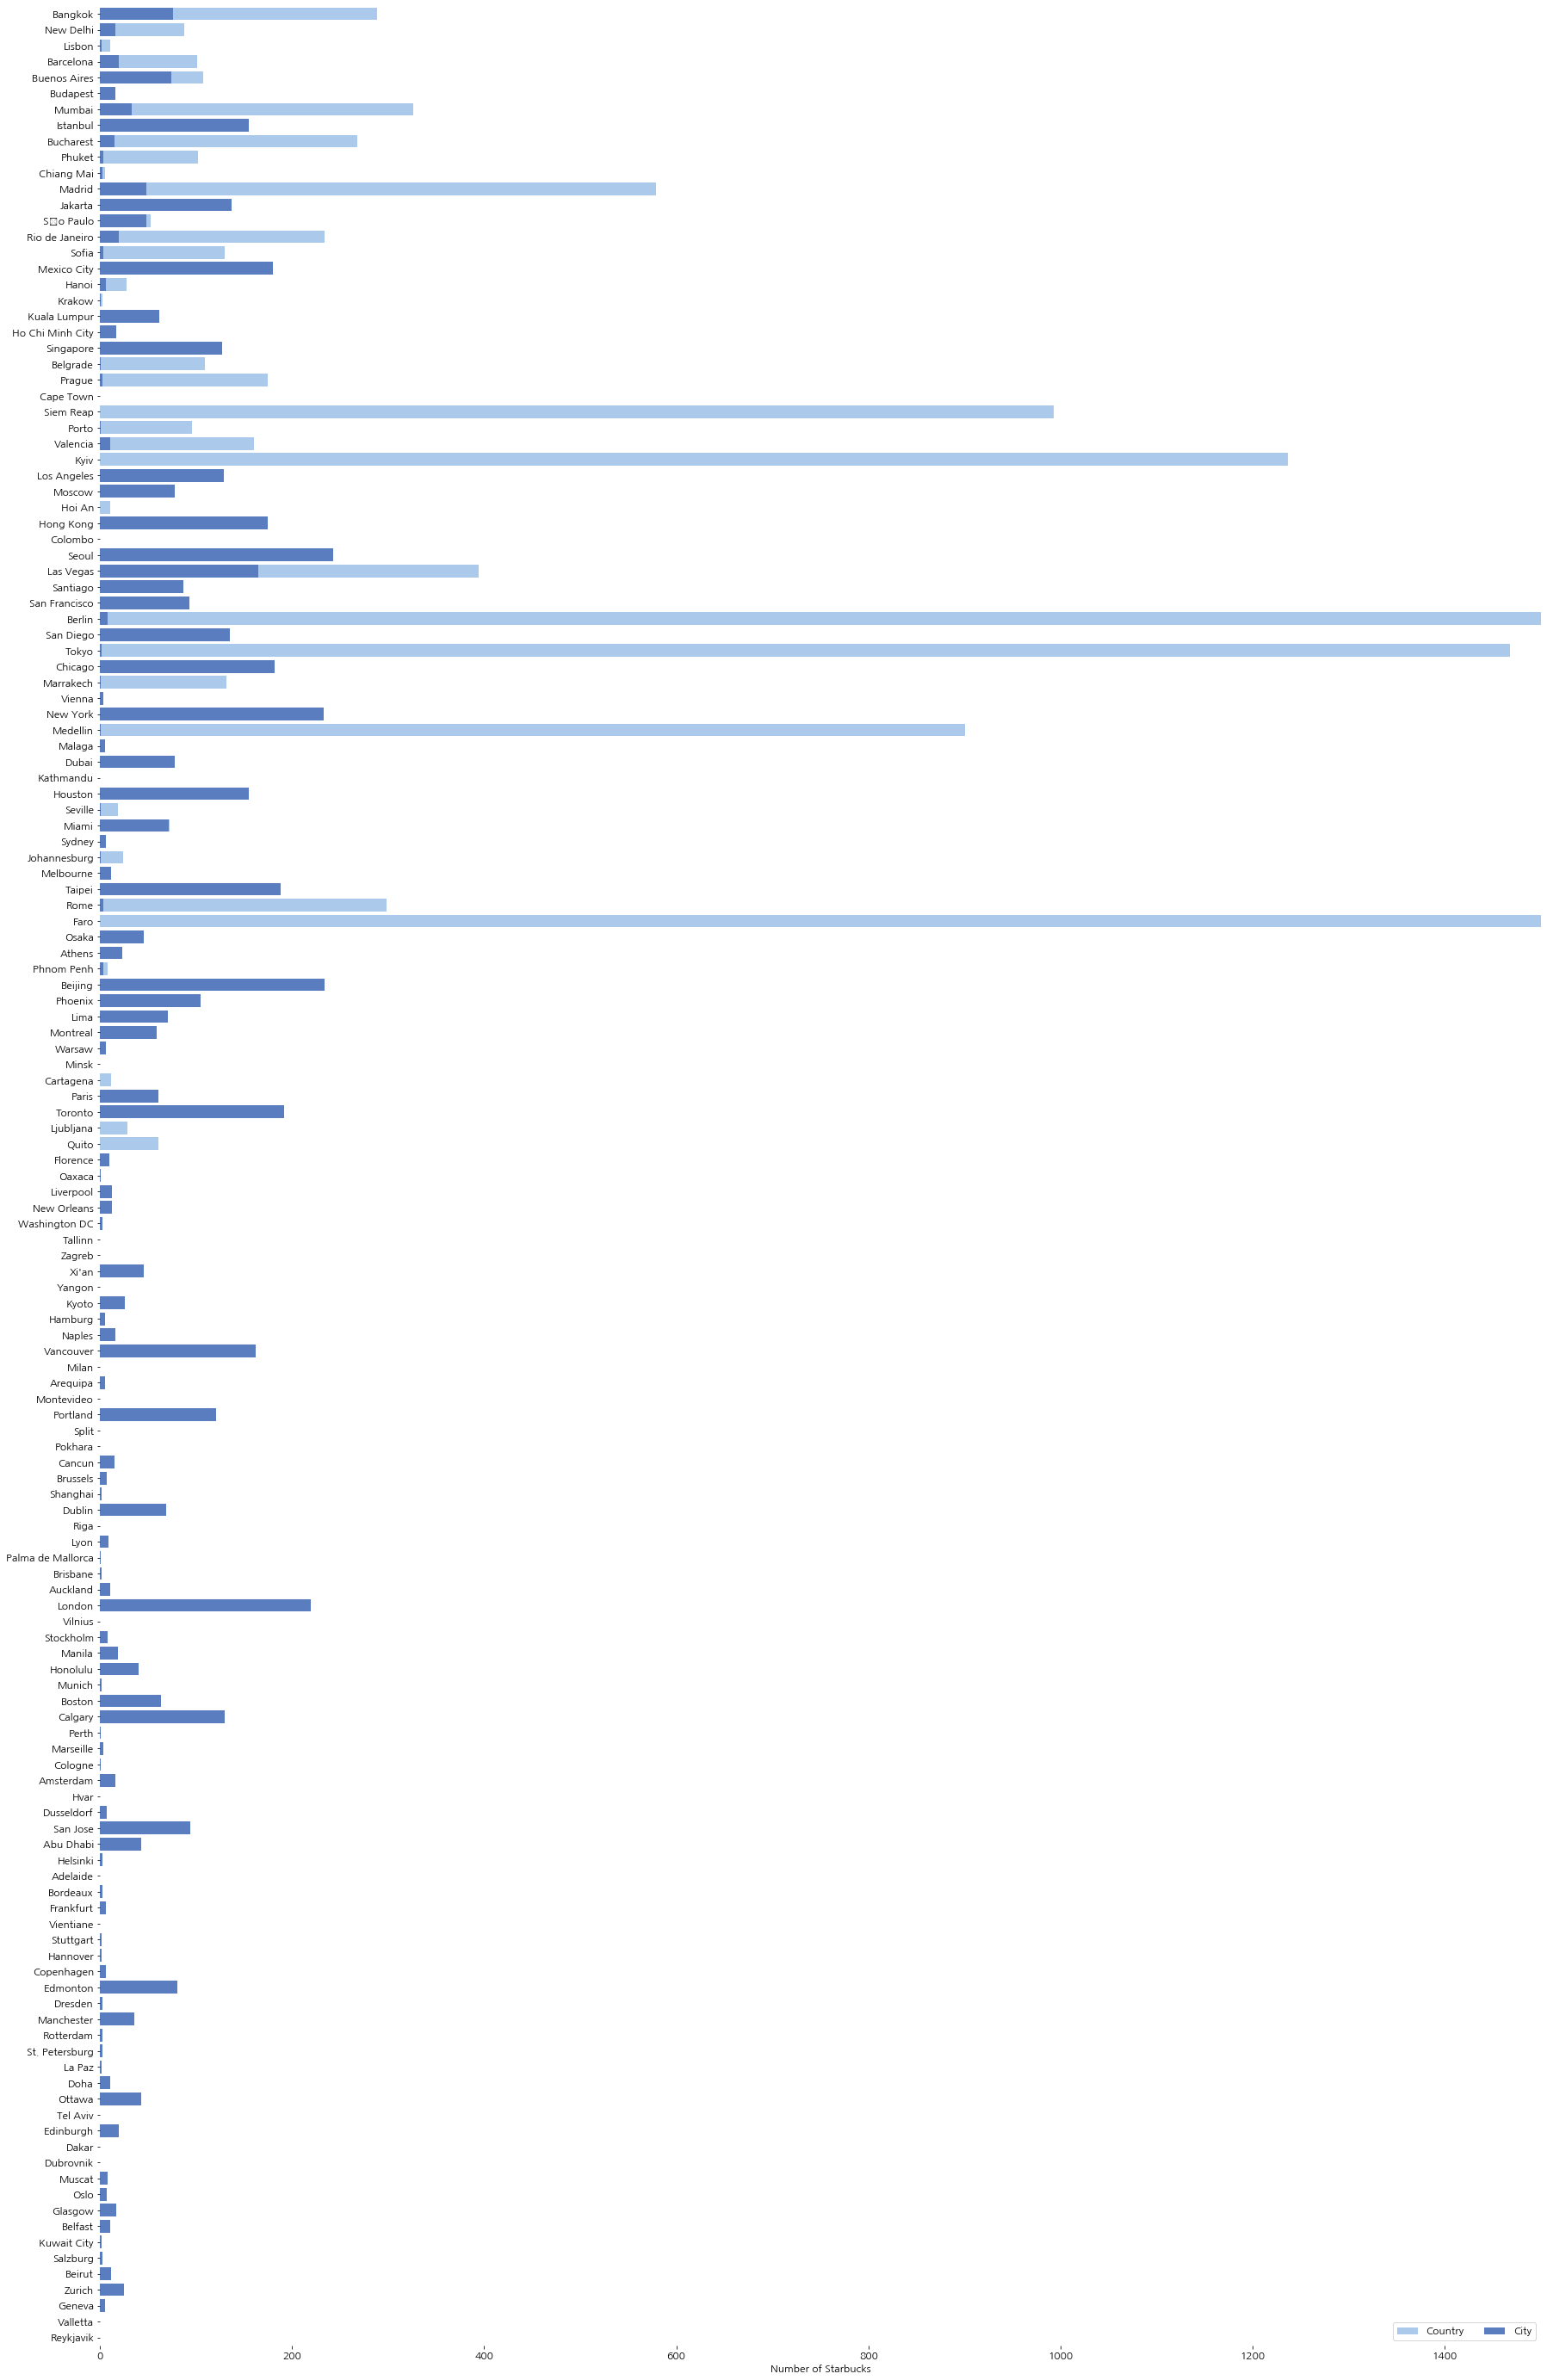

In [15]:

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 50))


sns.set_color_codes("pastel")
sns.barplot(x="num_st_country", y="Country", data=bc_st, label="Country", color="b")

sns.set_color_codes("muted")
sns.barplot(x="num_st_city", y="City", data=bc_st,
            label="City", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500), ylabel="",
       xlabel="Number of Starbucks")
sns.despine(left=True, bottom=True)


In [16]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


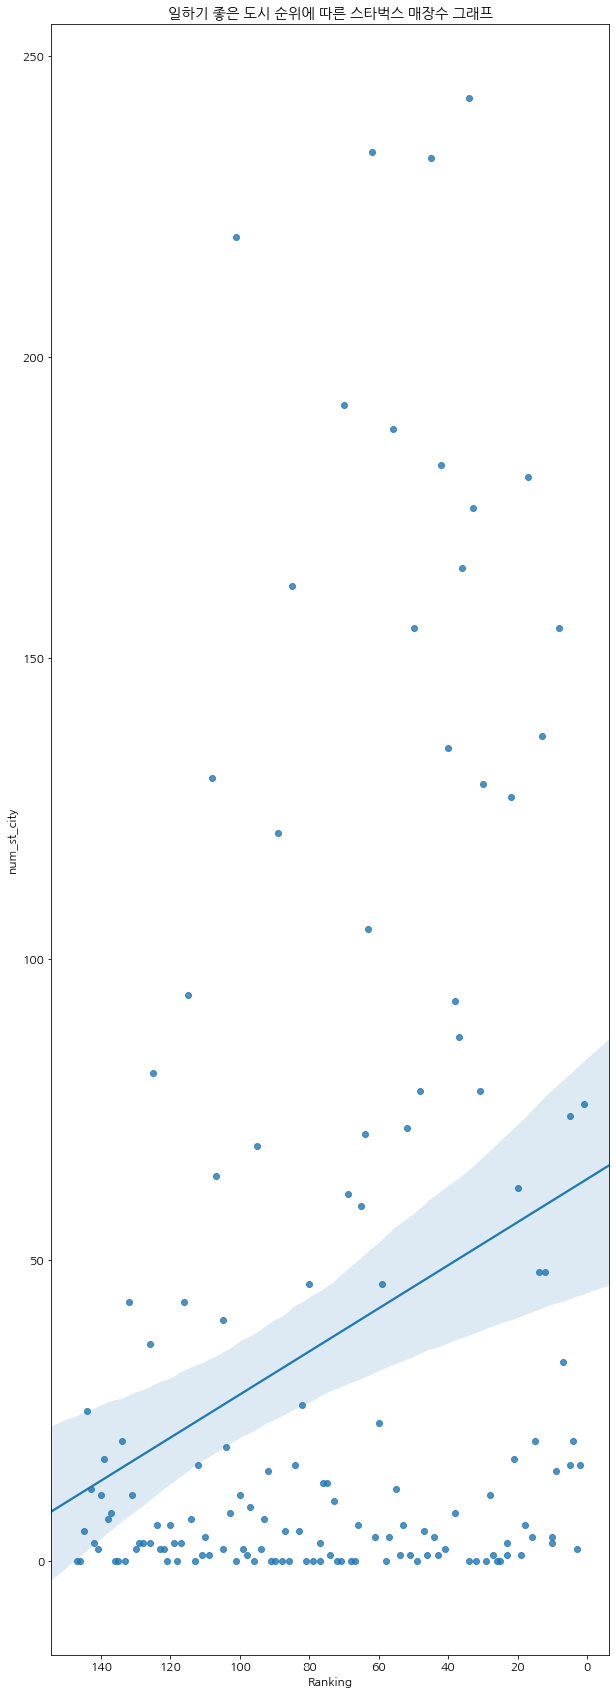

In [18]:
plt.title('일하기 좋은 도시 순위에 따른 스타벅스 매장수 그래프')
sns.regplot(x='Ranking', y='num_st_city', data=bc_st, fit_reg=True).invert_xaxis()
#일하기 좋은 도시의 랭킹(x축) 별 스타벅스 매장 수(y축)